In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import yaml

# Load the environment.yml file
with open("../configs/environment.yml", "r") as f:
    config = yaml.safe_load(f)

# Choose environment (local or aws)
env = "local"   # or "aws"

raw_data_path = config[env]["base_path"] + config[env]["raw_data"]
processed_data_path = config[env]["base_path"] + config[env]["processed_data"]
models_path = config[env]["base_path"] + config[env]["models"]

print("Raw data path:", raw_data_path)
print("Processed data path:", processed_data_path)
print("Models path:", models_path)

Raw data path: /Users/aditikulkarni/Documents/Masters/AI-Projects/04-ML-Models/clustering/data/raw/
Processed data path: /Users/aditikulkarni/Documents/Masters/AI-Projects/04-ML-Models/clustering/data/processed/
Models path: /Users/aditikulkarni/Documents/Masters/AI-Projects/04-ML-Models/clustering/models/


In [3]:
df = pd.read_csv(raw_data_path + "Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

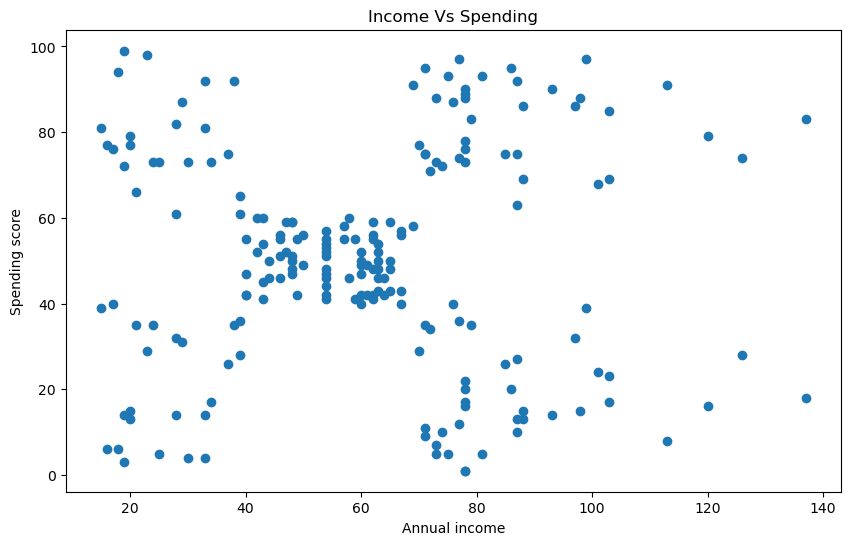

In [6]:
plt.figure(figsize = (10,6))
plt.scatter (df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual income')
plt.ylabel("Spending score")
plt.title("Income Vs Spending")
plt.show()

In [9]:
X = df.iloc[:,[3,4]].values
X.shape

(200, 2)

In [10]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

In [11]:
#kmeans = KMeans(n_cluster = 2,init = 'random',random_state = 42)
#kmeans.fit(X)


In [12]:
# elbow method

clustering_score = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'random',random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_)

In [13]:
clustering_score

[269981.27999999997,
 181363.595959596,
 106348.37306211119,
 73679.78903948836,
 44448.45544793371,
 37564.94305477131,
 31280.90384594093,
 25063.652515864094,
 21826.936303231654,
 20298.385936931285]

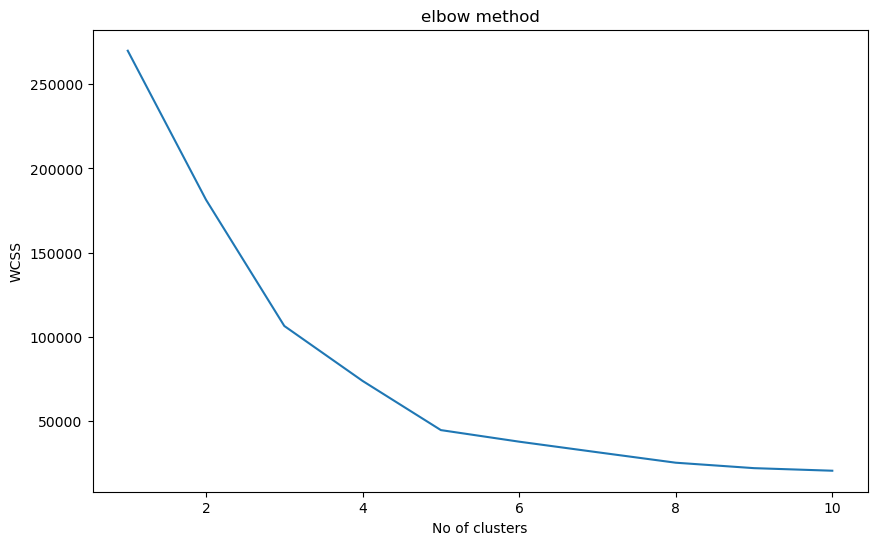

In [14]:
plt.figure(figsize = (10,6))
plt.plot (range(1,11),clustering_score)
plt.xlabel('No of clusters')
plt.ylabel("WCSS")
plt.title("elbow method")
plt.show()

In [15]:
clustering_score[4]

44448.45544793371

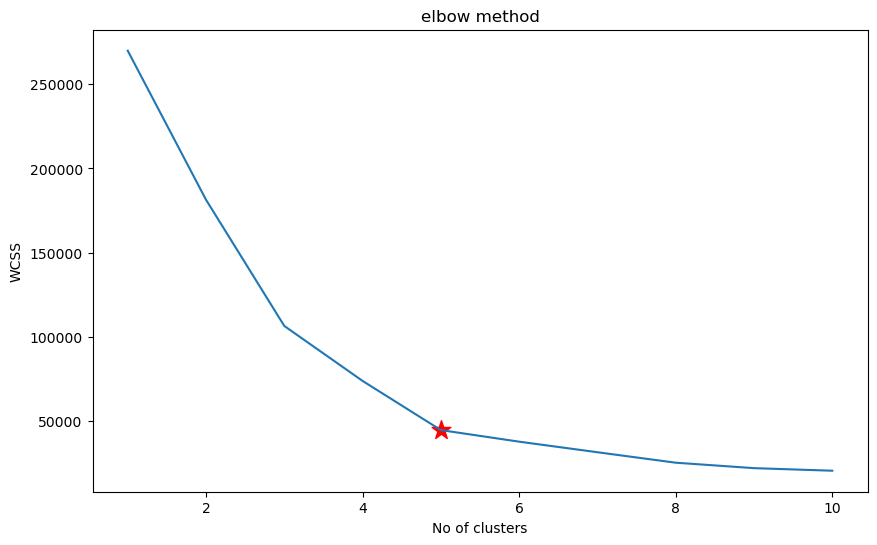

In [16]:
plt.figure(figsize = (10,6))
plt.plot (range(1,11),clustering_score)
plt.scatter(5,clustering_score[4],s = 200,c = 'red', marker = '*')
plt.xlabel('No of clusters')
plt.ylabel("WCSS")
plt.title("elbow method")
plt.show()

In [17]:
# Silhoutte score = used to determine degree of separation between cluster

# coeff range is in [-1, 1]

# if it is more towards 1 :  clustering is fine
# if it is more towards -1 :  clustering is incorrect

In [18]:
from sklearn.metrics import silhouette_score

silhouette_score_list = []

for i in range(2,11):
    silhouette_score_list.append(silhouette_score(X,(KMeans(n_clusters = i).fit_predict(X))))


In [19]:
silhouette_score_list

[0.39564531743995546,
 0.46761358158775435,
 0.4931963109249047,
 0.5532176107575425,
 0.5379675585622219,
 0.45798060357730574,
 0.49547566129339077,
 0.4242002473146508,
 0.4267982146229541]

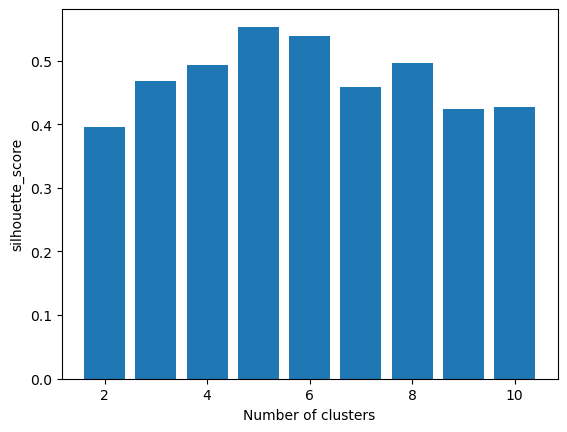

In [20]:
k = [2,3,4,5,6,7,8,9,10]

plt.bar(k,silhouette_score_list)
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_score")
plt.show()

In [21]:
# highest silhoutte score from bar graph is for cluster size 5

In [22]:
# from both elbow , silhoutte method its confirm that n_clusters = 5

In [35]:
# set up a model
# default Init is k-means++ {‘k-means++’, ‘random’}
kmeans = KMeans(n_clusters = 5,init = 'random',random_state = 42)

# fit model
kmeans.fit(X)

# predict
pred = kmeans.predict(X)


In [24]:
pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [25]:
len(pred)

200

In [26]:
df['cluster'] = pd.DataFrame(pred, columns = ['Cluster'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


In [27]:
df[df['cluster']==1]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
1,2,Male,21,15,81,1
3,4,Female,23,16,77,1
5,6,Female,22,17,76,1
7,8,Female,23,18,94,1
9,10,Female,30,19,72,1
11,12,Female,35,19,99,1
13,14,Female,24,20,77,1
15,16,Male,22,20,79,1
17,18,Male,20,21,66,1
19,20,Female,35,23,98,1


In [28]:
df['cluster'].value_counts()

cluster
4    81
3    39
2    35
0    23
1    22
Name: count, dtype: int64

In [29]:
# centroid of each cluster

kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852]])

In [30]:
kmeans.cluster_centers_[:,0]

array([26.30434783, 25.72727273, 88.2       , 86.53846154, 55.2962963 ])

In [31]:
kmeans.cluster_centers_[:,1]

array([20.91304348, 79.36363636, 17.11428571, 82.12820513, 49.51851852])

In [32]:
X[pred==0,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39])

In [33]:
X[pred==0,1]

array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4,
       14, 17, 26, 35, 36, 28])

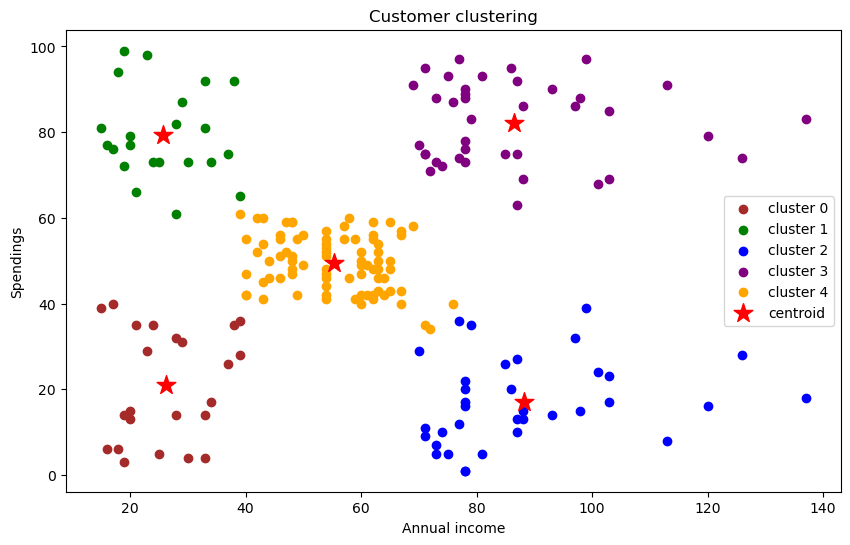

In [34]:
plt.figure(figsize = (10,6))
plt.scatter(X[pred==0,0],X[pred==0,1],c = 'brown',label = 'cluster 0')
plt.scatter(X[pred==1,0],X[pred==1,1],c = 'green',label = 'cluster 1')
plt.scatter(X[pred==2,0],X[pred==2,1],c = 'blue',label = 'cluster 2')
plt.scatter(X[pred==3,0],X[pred==3,1],c = 'purple',label = 'cluster 3')
plt.scatter(X[pred==4,0],X[pred==4,1],c = 'orange',label = 'cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200,
            c = 'red', marker = '*',label = 'centroid')

plt.title("Customer clustering")
plt.xlabel("Annual income")
plt.ylabel("Spendings")
plt.legend()
plt.show()
